演習課題：サイコロの目の認識AIの構築

dice-01.ipynb : USBカメラの画像保存プログラム

* 保存先：Google Drive
* ファイル名：dice_（サイコロ番号）_（撮影時刻）.jpg


In [ ]:
# Google Driveをマウント
from google.colab import drive
drive.mount('/content/drive')

# OpenCV imshowサポートパッチのインポート
from google.colab.patches import cv2_imshow

# ライブラリインポート
import os
import cv2
import datetime
from pytz import timezone

Mounted at /content/drive


In [ ]:
# USBカメラのデータを取得するために必要な処理（Google Colabコード：Camera Captureより）
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

実行すると，保存するサイコロ画像の目（数字）を入力するテキストボックスが表示されるので対象の数字を入力してエンターキーを押してください

画像は「Capture」ボタンを押すと保存されます

保存するサイコロの番号を入力してください
6


<IPython.core.display.Javascript object>

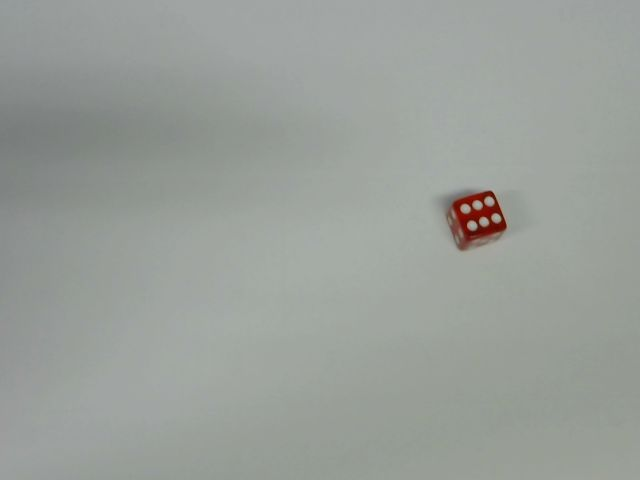

Saved to /content/drive/MyDrive/Colab Notebooks/img_dice/dice-6-20250604-163414.jpg


In [ ]:
# ファイル名の情報指定
print('保存するサイコロの番号を入力してください')
dice_number = input()
# 現在時刻取得
time_zone = timezone('Asia/Tokyo')
time_now = datetime.datetime.now(time_zone)
save_time = time_now.strftime('%Y%m%d-%H%M%S')
# ファイル保存パスの設定
directory_name = '/content/drive/MyDrive/Colab Notebooks/AI-Kouza/img_dice/'
img_name = 'dice-' + dice_number + '-' + save_time + '.jpg'

# 画像を取得して保存
try:
  # 画像取得
  filename = take_photo()
  img = cv2.imread(filename)
  # フォルダが存在しなかったら新規作成
  if not os.path.exists(directory_name):
    os.mkdir(directory_name)
  # 画像を画面に表示
  # cv2.imshowはColabではエラーになるためGoogle Colabの関数(cv2_imshow)を使用
  cv2_imshow(img)
  # 画像ファイル保存
  cv2.imwrite(directory_name + img_name, img)
  print('Saved to {}'.format(directory_name + img_name))


except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

